In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from IPython.display import display, Markdown
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import EnsembleVoteClassifier
from IPython.display import display, Markdown, Latex
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
def score_rocAuc(model_predict,ytest):
    count = 0
    for prediction in range(len(model_predict)):
        if model_predict[prediction] == ytest[prediction]:
            count +=1
    acc = count/len(model_predict)
    aoc = metrics.roc_auc_score(ytest,model_predict)
    return acc,aoc

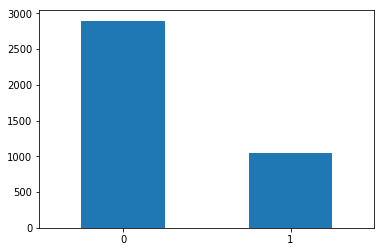

In [7]:
%matplotlib inline
df_train = pd.read_csv('../Preprocessed Data/cleaned_dataset_train.csv')
df_test = pd.read_csv('../Preprocessed Data//cleaned_dataset_test.csv')
#df = pd.read_csv('../cleaned_dataset.csv')
df_train['insult'].value_counts().plot(kind = "bar", rot=0)

In [8]:
X_train = df_train['comment'].fillna(" ").tolist()
Y_train = df_train['insult'].tolist()

X_test = df_test['comment'].fillna(" ").tolist()
Y_test = df_test['insult'].tolist()

vectorizer = CountVectorizer()
#vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [9]:
predictions =[]
models = []

model1 = LogisticRegression()
models.append(model1)
model1.fit(X_train,Y_train)
predictions.append(model1.predict(X_test))

model2 = svm.SVC()
model2.fit(X_train,Y_train)
models.append(model2)
predictions.append(model2.predict(X_test))

model3 = RandomForestClassifier()
model3.fit(X_train,Y_train)
models.append(model3)
predictions.append(model3.predict(X_test))

In [10]:
p =score_rocAuc(predictions[0],Y_test)
data = "**Accuracy Logistic Regression** : " + str(p[0]) + "<br>" + "**AUC Score Logistic Regression** : " + str(p[1]) 
display(Markdown(data))

p =score_rocAuc(predictions[1],Y_test)
data = "**Accuracy SVM** : " + str(p[0]) + "<br>" + "**AUC Score SVM** : " + str(p[1]) 
display(Markdown(data))

p =score_rocAuc(predictions[2],Y_test)
data = "**Accuracy Random Forrest** : " + str(p[0]) + "<br>" + "**AUC Score Random Forrest** : " + str(p[1]) 
display(Markdown(data))


**Accuracy Logistic Regression** : 0.8454854552323385<br>**AUC Score Logistic Regression** : 0.759848817167

**Accuracy SVM** : 0.7381941820929354<br>**AUC Score SVM** : 0.5

**Accuracy Random Forrest** : 0.8084624102757839<br>**AUC Score Random Forrest** : 0.658411132823

In [11]:

new = EnsembleVoteClassifier(clfs=models, refit=False)
new.fit(X_train,Y_train)
l = new.predict(X_test)

p = score_rocAuc(l,Y_test)

data = "**Accuracy** : " + str(p[0]) + "<br>" + "**AUC Score** : " + str(p[1]) 
display(Markdown(data))

**Accuracy** : 0.8073290517567057<br>**AUC Score** : 0.644140631346